## árboles de decisión
+ se divide sucesivamente el arbol por un atributo distinto en cada ramificación.
+ En la ultima etapa las hojas entran dentro de un label u otro dependiendo de la cantidad de casos observados (umbral o mitad+1)

Criterios para la selección de atributos de ramificación:
+ Para harta certeza se requiere homogeneidad en la composición de las hojas (en cuanto a cantidad de integrantes, no a proporción de outputs) : un árbol balanceado.
+ Entropía: H(D) = - sum[c in C] pclog2pc --> esperanza de información en subconjunto


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
target = pd.DataFrame(iris.target, columns = ['target'])

In [10]:
iris_data.head(4)
#features con identificadores 0,1,..

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [12]:
target.head(4)
#identificadores y su clasificación (0,1,2)

,target
0,0
1,0
2,0
3,0


In [23]:
X,y = load_iris(return_X_y=True) 
#X array con features (4xrows) 
#y array con clasificadores

#split de X e y en subset train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=0)
#con random state = int : fija un seed para resultados reproducibles

In [44]:
clasificador = DecisionTreeClassifier(max_depth = 4, criterion='entropy') #gini o entropy
clasificador.fit(X_train,y_train)
target_pred = clasificador.predict(X_test)
print('Predicción: ',target_pred)
print('Predicción: ',y_test)
aciertos = len([val for val in (target_pred-y_test) if ~val])
print(f'{aciertos} aciertos de un total de {len(y_test)} (incorrecto!!)')

Predicción:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]
Predicción:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2]
58 aciertos de un total de 60 (incorrecto!!)


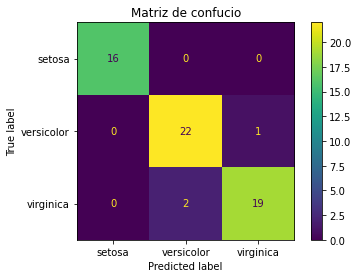

In [45]:
disp = plot_confusion_matrix(clasificador,X_test,y_test, display_labels = iris.target_names)
disp.ax_.set_title('Matriz de confucio')
plt.show()